## Классификация MNIST

##### Автор: [Радослав Нейчев](https://www.linkedin.com/in/radoslav-neychev/), https://t.me/s/girafe_ai

In [2]:
import numpy as np

import torch
from torch import nn
from torch.nn import functional as F

import torchvision
from torchvision.datasets import MNIST

from tqdm import tqdm

from matplotlib import pyplot as plt
from IPython.display import clear_output
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


Давайте обратимся к классической задаче распознавания рукописных цифр. Мы будем работать с набором данных [MNIST](http://yann.lecun.com/exdb/mnist/). В этом задании мы воспользуемся всем датасетом целиком.

__Ваша основная задача: реализовать весь пайплайн обучения модели и добиться качества $\geq 92\%$ на тестовой выборке.__

Код для обучения модели в данном задании отсутствует. Присутствует лишь несколько тестов, которые помогут вам отладить свое решение. За примером можно обратиться к ноутбуку с первого занятия.

Мы настоятельно рекомендуем писать код «с нуля», лишь изредка подглядывая в готовые примеры, а не просто «копировать-вставлять». Это поможет вам в будущем.

100%|██████████| 9.91M/9.91M [00:00<00:00, 15.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 447kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.17MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.42MB/s]


Text(0.5, 1.0, 'Image label: 9')

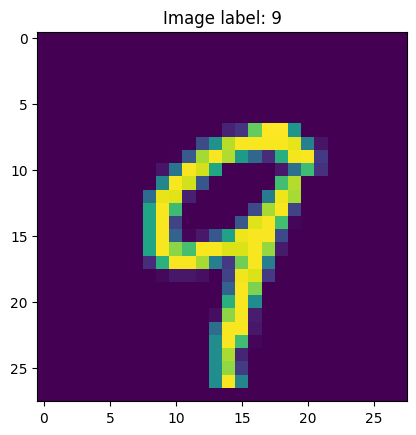

In [3]:
# do not change the code in the block below
# __________start of block__________

train_mnist_data = MNIST('.', train=True, transform=torchvision.transforms.ToTensor(), download=True)
test_mnist_data = MNIST('.', train=False, transform=torchvision.transforms.ToTensor(), download=True)


train_data_loader = torch.utils.data.DataLoader(
    train_mnist_data,
    batch_size=32,
    shuffle=True,
    num_workers=2
)

test_data_loader = torch.utils.data.DataLoader(
    test_mnist_data,
    batch_size=32,
    shuffle=False,
    num_workers=2
)

random_batch = next(iter(train_data_loader))
_image, _label = random_batch[0][0], random_batch[1][0]
plt.figure()
plt.imshow(_image.reshape(28, 28))
plt.title(f'Image label: {_label}')
# __________end of block__________

Постройте модель, представленную ниже. Пожалуйста, не создавайте чрезмерно сложную сеть — она не должна быть глубже четырёх слоёв (можно и меньше). Ваша основная задача — обучить модель и добиться как минимум 92% точности на тестовой выборке (hold-out выборке).

*Примечание: линейных слоёв и функций активации должно быть достаточно.*

__Обратите внимание, ваша модель должна быть представлена переменной `model`__

In [17]:
class Classificate_model(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(input_size, 512),
        nn.ReLU(),
        nn.Linear(512, 1024),
        nn.ReLU(),
        nn.Linear(1024, 2048),
        nn.ReLU(),
        nn.Linear(2048, output_size)
    )

  def forward(self, input):
    output = self.linear_relu_stack(input)

    return output

In [18]:
# Creating model instance
model = Classificate_model(784,10).to(device) # your code here

Ниже доступны локальные тесты для проверки вашей модели:

In [19]:
# do not change the code in the block below
# __________start of block__________
assert model is not None, 'Please, use `model` variable to store your model'

try:
    x = random_batch[0].reshape(-1, 784).to(device)
    y = random_batch[1].to(device)

    # compute outputs given inputs, both are variables
    y_predicted = model(x)
except Exception as e:
    print('Something is wrong with the model')
    raise e


assert y_predicted.shape[-1] == 10, 'Model should predict 10 logits/probas'

print('Everything seems fine!')
# __________end of block__________

Everything seems fine!


Обучите модель на обучающей выборке. Рекомендуем поэкспериментировать с различными оптимизаторами.


In [34]:
def train_loop(model,
               train_dataset,
               loss_fn,
               optimizer,
               num_epochs
               ):

  losses = []
  for epoch in range(num_epochs):
    loss_on_epoch = []

    for batch in tqdm(train_dataset):
      optimizer.zero_grad()
      x = batch[0].to(device)
      y = batch[1].to(device)
      pred = model(x)

      loss = loss_fn(pred,y)
      loss.backward()
      optimizer.step()
      loss_on_epoch.append(loss.item())

    losses.append(sum(loss_on_epoch) / len(loss_on_epoch))
    print(f'Loss on {epoch + 1}: {losses[-1]}')

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [46]:
train_loop(model, train_data_loader,loss_fn, optimizer,10)

100%|██████████| 1875/1875 [00:11<00:00, 157.68it/s]


Loss on 1: 0.34459678939978283


100%|██████████| 1875/1875 [00:11<00:00, 160.34it/s]


Loss on 2: 0.3336600315928459


100%|██████████| 1875/1875 [00:12<00:00, 155.72it/s]


Loss on 3: 0.32392811540762584


100%|██████████| 1875/1875 [00:12<00:00, 154.18it/s]


Loss on 4: 0.314796525768439


100%|██████████| 1875/1875 [00:11<00:00, 160.47it/s]


Loss on 5: 0.3064862739900748


100%|██████████| 1875/1875 [00:11<00:00, 158.07it/s]


Loss on 6: 0.2985766024450461


100%|██████████| 1875/1875 [00:11<00:00, 162.92it/s]


Loss on 7: 0.29127751896381376


100%|██████████| 1875/1875 [00:11<00:00, 167.31it/s]


Loss on 8: 0.28417663971583046


100%|██████████| 1875/1875 [00:11<00:00, 164.09it/s]


Loss on 9: 0.27745684772531193


100%|██████████| 1875/1875 [00:11<00:00, 162.43it/s]

Loss on 10: 0.27089452912708123


Также помните, что вы всегда можете обратиться к отличной [документации](https://pytorch.org/docs/stable/index.html) и [учебным материалам](https://pytorch.org/tutorials/).

Оценим качество классификации:

In [47]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in train_data_loader:
        y_predicted = model(batch[0].reshape(-1, 784).to(device))
        predicted_labels.append(y_predicted.argmax(dim=1))
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels).to(device)
train_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

In [48]:
print(f'Neural network accuracy on train set: {train_acc:3.5}')

Neural network accuracy on train set: 0.92315


In [49]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in test_data_loader:
        y_predicted = model(batch[0].reshape(-1, 784).to(device))
        predicted_labels.append(y_predicted.argmax(dim=1))
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels).to(device)
test_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

In [50]:
print(f'Neural network accuracy on test set: {test_acc:3.5}')

Neural network accuracy on test set: 0.9236


Проверка, что пороги пройдены:

In [51]:
assert test_acc >= 0.92, 'Test accuracy is below 0.92 threshold'
assert train_acc >= 0.91, 'Train accuracy is below 0.91 while test accuracy is fine. We recommend to check your model and data flow'

Обращаем внимане, код ниже предполагает, что ваша модель имеет содержится в переменной `model`, а файл `hw_mnist_data_dict.npy` находится в той же директории, что и ноутбук (он доступен в репозитории).

In [56]:
cpu = torch.device('cpu')

In [59]:
# do not change the code in the block below
# __________start of block__________
import os
import json
assert os.path.exists('hw_mnist_data_dict.npy'), 'Please, download `hw_mnist_data_dict.npy` and place it in the working directory'

def get_predictions(model, eval_data, step=10):

    predicted_labels = []
    model.eval()
    with torch.no_grad():
        for idx in range(0, len(eval_data), step):
            y_predicted = model(eval_data[idx:idx+step].reshape(-1, 784).to(device))
            predicted_labels.append(y_predicted.argmax(dim=1))

    predicted_labels = torch.cat(predicted_labels).to(cpu).numpy()
    predicted_labels = ','.join([str(x) for x in list(predicted_labels)])
    return predicted_labels

loaded_data_dict = np.load('hw_mnist_data_dict.npy', allow_pickle=True)

submission_dict = {
    'train': get_predictions(model, torch.FloatTensor(loaded_data_dict.item()['train'])),
    'test': get_predictions(model, torch.FloatTensor(loaded_data_dict.item()['test']))
}

with open('submission_dict_mnist_task_1.json', 'w') as iofile:
    json.dump(submission_dict, iofile)
print('File saved to `submission_dict_mnist_task_1.json`')
# __________end of block__________

File saved to `submission_dict_mnist_task_1.json`


### Сдача задания
Сдайте сгенерированный файл в соответствующую задачу в соревновании, а именно:
    
* `submission_dict_mnist_task_1.json` в задачу Warmup (hw_mnist)

На этом задание завершено. Поздравляем!